In [26]:
import os
import warnings
import pandas as pd

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

col_names =  ["Locality",     
              "Type_of_property",
              "Subtype_of_property",
              "Price",
              "Type_of_sale",
              "Number_of_rooms",
              "Living_Area",
              "Fully_equipped_kitchen",
              "Furnished",
              "Open_fire",
              "Terrace",
              "Terrace_Area",
              "Garden",
              "Garden_Area",
              "Surface_area_of_the_plot_of_land",
              "Number_of_facades",
              "Swimming_pool",
              "State_of_the_building"
              ]

file_path = r"C:\Users\Sacha\Documents\BeCode\real-estate-price-prediction\data_analysis\main_csv.csv" 
df_final = pd.read_csv(file_path)
df_final = df_final.dropna(subset=['Terrace_Area']) #at first drop the Nan, we will se after if we can make nan=0

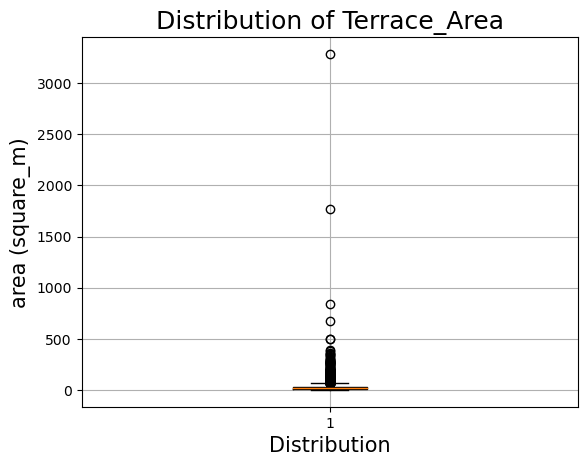

In [27]:
plt.boxplot(df_final['Terrace_Area'])
plt.xlabel('Distribution', fontsize=15)
plt.ylabel("area (square_m)", fontsize=15)

plt.title('Distribution of Terrace_Area', fontsize=18)
plt.grid(True)

plt.show()

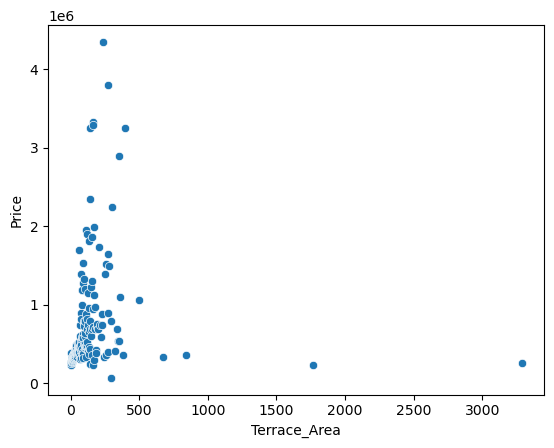

In [28]:
median_price_by_rooms = df_final.groupby("Terrace_Area")["Price"].median().reset_index()
sns.scatterplot(x="Terrace_Area", y="Price", data=median_price_by_rooms)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x500 with 0 Axes>

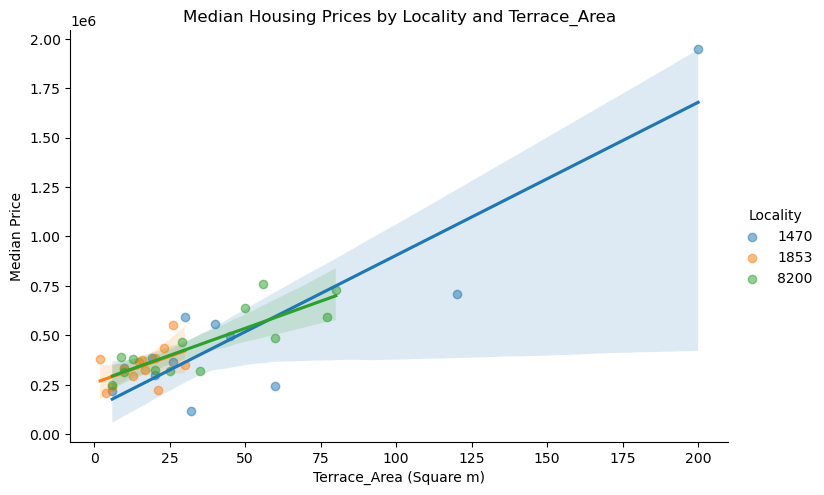

In [29]:
# Compute the median price by number of rooms for each locality
groupby_area = df_final.groupby(["Locality", "Terrace_Area"])["Price"].median().reset_index()

# Filter the dataframe to include only the first 10 localities
sample_localities = groupby_area['Locality'].value_counts().sort_values(ascending=False).index[100:103]
groupby_area = groupby_area[groupby_area['Locality'].isin(sample_localities)]

# Increase the size of the plot
plt.figure(figsize=(10,5))

# Create the scatter plot
sns.lmplot(x="Terrace_Area", y="Price", hue="Locality", data=groupby_area, scatter_kws={'alpha':0.5}, aspect=1.5)

# Add x and y axis labels
plt.xlabel('Terrace_Area (Square m)')
plt.ylabel('Median Price')

# Add a title to the plot
plt.title('Median Housing Prices by Locality and Terrace_Area')

plt.show

## let's try area = 0 if area = nan

In [23]:
col_names =  ["Locality",     
              "Type_of_property",
              "Subtype_of_property",
              "Price",
              "Type_of_sale",
              "Number_of_rooms",
              "Living_Area",
              "Fully_equipped_kitchen",
              "Furnished",
              "Open_fire",
              "Terrace",
              "Terrace_Area",
              "Garden",
              "Garden_Area",
              "Surface_area_of_the_plot_of_land",
              "Number_of_facades",
              "Swimming_pool",
              "State_of_the_building"
              ]

file_path = r"C:\Users\Sacha\Documents\BeCode\real-estate-price-prediction\data_analysis\main_csv.csv" 
df_final = pd.read_csv(file_path)

In [24]:
df_final["Terrace_Area"] = df_final["Terrace_Area"].fillna(0)
print(sum(df_final["Terrace_Area"] == 0))

9280


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x500 with 0 Axes>

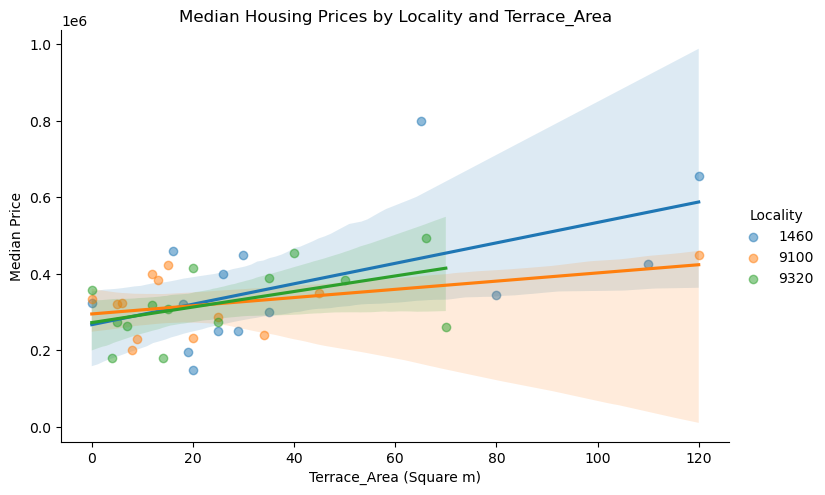

In [25]:
# Compute the median price by number of rooms for each locality
groupby_area = df_final.groupby(["Locality", "Terrace_Area"])["Price"].median().reset_index()

# Filter the dataframe to include only the first 10 localities
sample_localities = groupby_area['Locality'].value_counts().sort_values(ascending=False).index[100:103]
groupby_area = groupby_area[groupby_area['Locality'].isin(sample_localities)]

# Increase the size of the plot
plt.figure(figsize=(10,5))

# Create the scatter plot
sns.lmplot(x="Terrace_Area", y="Price", hue="Locality", data=groupby_area, scatter_kws={'alpha':0.5}, aspect=1.5)

# Add x and y axis labels
plt.xlabel('Terrace_Area (Square m)')
plt.ylabel('Median Price')

# Add a title to the plot
plt.title('Median Housing Prices by Locality and Terrace_Area')

plt.show